# Perkenalan

Nama : Arry Pandowo
Batch 001 Full-Stack Data Science Hacktiv8 Graded Challange Week 2

## Tujuan dan metode pelaksanaan

Tujuan dari tugas ini adalah mengolah sebuah gambar dengan menggunakan metode turunan parsial gradient untuk menemukan edge dari gambar anjing tersebut
metode yang dilakukan
* Loading gambar menggunakan library PIL image
* identifikasi dan manipulasi gambar
* Split Gambar menjadi RGB dan di simpan kedalam array menggunakan numpy
* Menggunakan Flipr untuk melakukan flip image
* Melakukan Transformasi Linear untuk Y Axis
* menentukan magnitude nilai turunan dengan threshold tertentu agar menemukan nilai dari edge
* Menyimpulkan hasil dari pencarian edge

# Library

In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Penjelasan penggunaan library : 
* PIL digunakan untuk load gambar
* numpy digunakan untuk melakukan penyimapanan dan manipulasi array
* pyplot digunakan untuk menampilkan hasil dari array
* mpimg digunakan untuk melakukan penyimpanan array dari gambar

# Data Loading

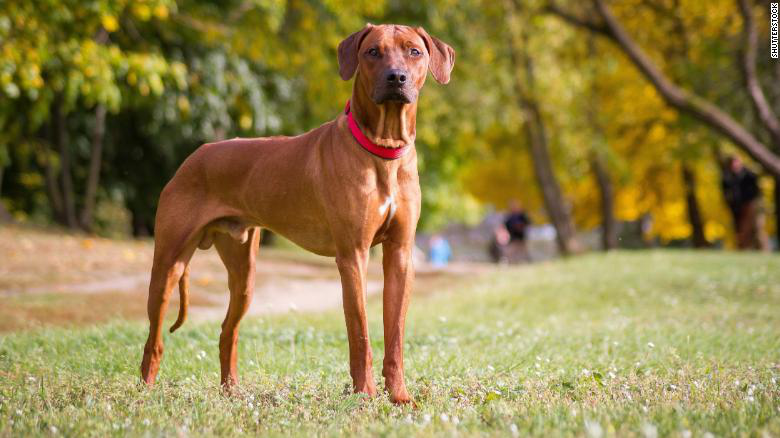

In [41]:
img = Image.open("doge.jpg")
img

Image berhasil di load dan disimpan kedalam variable img

# Data Preprocessing

## mendefinisikan data array dari dogo

In [42]:
doge = mpimg.imread('doge.jpg')

menyimpan image kedalam variable doge

## shape dari image

In [43]:
np.array(doge).shape

(438, 780, 3)

## Flip image menggunakan flipr

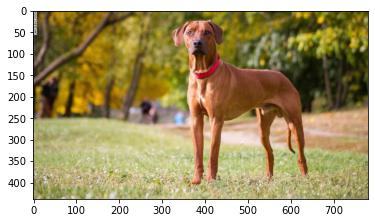

In [44]:
dogeFlip = np.fliplr(doge)
plt.imshow(dogeFlip)

## Split Layer RGB

In [45]:
red, green, blue = img.split()
red = np.array(red)
green = np.array(green)
blue = np.array(blue)

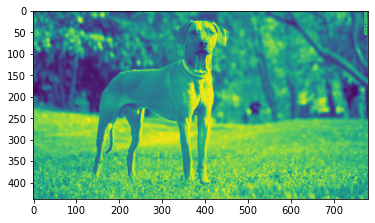

In [46]:
plt.imshow(red)

Layer Red pada gambar 

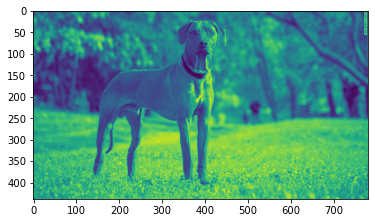

In [47]:
plt.imshow(green)

layer Green pada gambar

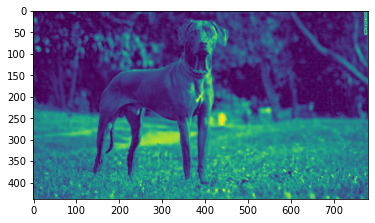

In [48]:
plt.imshow(blue)

layer Blue pada Gambar

## Mengubah menjadi grayscale

In [49]:
def dogeToGray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

Formula transformasi dari array RGB ke Grayscale

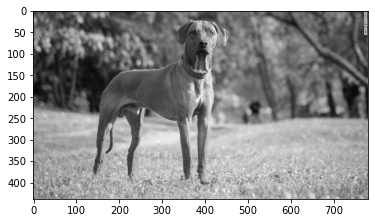

In [50]:
dogeGray = dogeToGray(doge)
plt.imshow(dogeGray, cmap = "gray")

hasil transformasi array RGB To grayscale yang dimapping ke gray dengan attribute cmap

## Linear Transformation Flip in y Axis

In [51]:
flip_doge = []
col=red.shape[0]-1
for i in range(red.shape[0]):
    flip_doge.append([])
    for j in range(red.shape[0]):
        if j!=col:
            flip_doge[i].append(0)
        else:
            flip_doge[i].append(1)
    col-=1
flip_doge = np.array(flip_doge)
flip_doge, flip_doge.shape

(array([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]]),
 (438, 438))

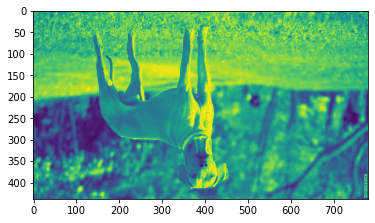

In [52]:
plt.imshow(flip_doge.dot(red))

# Image Processing

## Matrix 0

In [53]:
doge_x = np.gradient(doge, axis = 0)
doge_y = np.gradient(doge, axis = 1)

digunakan untuk melakukan perhitungan Gradient Magnitude dan Turunan Parsial

## Turunan parsial Doge Red Layer X

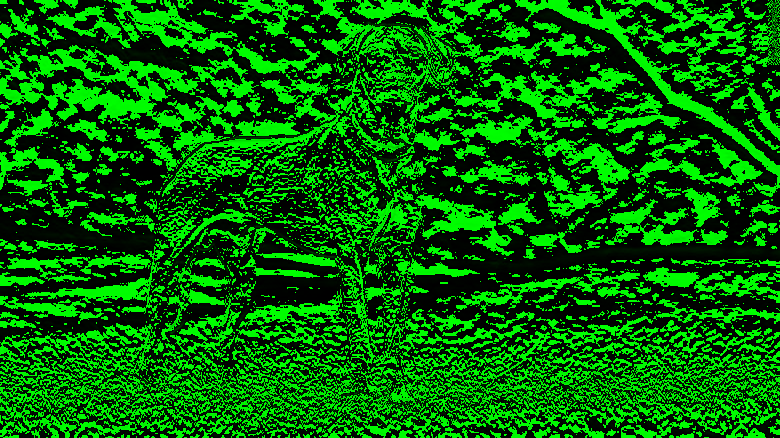

In [54]:
dogeRedX = np.zeros(doge_x.shape, dtype="uint8")
dogeRedX[:,:,1] = doge_x[:,:,1]
showDogeRedX = Image.fromarray(dogeRedX)
showDogeRedX

## Turunan parsial Doge Red Layer Y

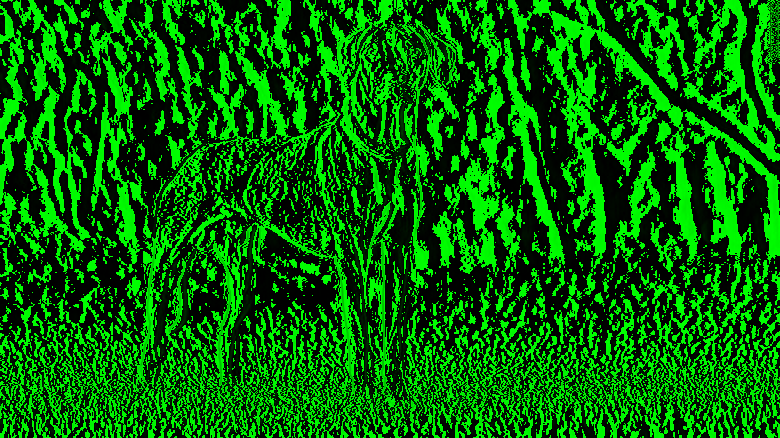

In [55]:
dogeRedY = np.zeros(doge_y.shape, dtype="uint8")
dogeRedY[:,:,1] = doge_y[:,:,1]
showDogeRedY = Image.fromarray(dogeRedY)
showDogeRedY

## Gradient Magnitude


In [56]:
mag=np.sqrt(doge_x**2+doge_y**2)
mag

array([[[  9.21954446,   9.        ,   9.        ],
        [ 11.01135777,   9.1241438 ,   9.48683298],
        [  9.05538514,   7.61577311,   9.43398113],
        ...,
        [  2.5       ,   2.23606798,   5.38516481],
        [ 18.82153022,  18.82153022,  19.41648784],
        [ 25.55386468,  25.55386468,  25.55386468]],

       [[ 11.        ,  10.        ,   9.5       ],
        [ 11.01135777,  10.0124922 ,  10.30776406],
        [  9.61769203,   8.63133825,   8.7321246 ],
        ...,
        [  7.21110255,   7.38241153,   5.38516481],
        [  4.60977223,   4.60977223,   6.02079729],
        [ 27.55449147,  27.29468813,  28.44292531]],

       [[  9.70824392,   8.5       ,   8.06225775],
        [  9.21954446,   9.        ,   9.1241438 ],
        [  8.24621125,   8.01560977,   7.28010989],
        ...,
        [104.54305333, 108.02893131, 110.72149746],
        [ 15.65247584,  15.23154621,  13.60147051],
        [ 33.42154993,  30.15377257,  32.22188697]],

       ...,

      

hasil perhitungan dari magnitude gambar 

## Penggabungan dengan hasil perhitungan magnitude

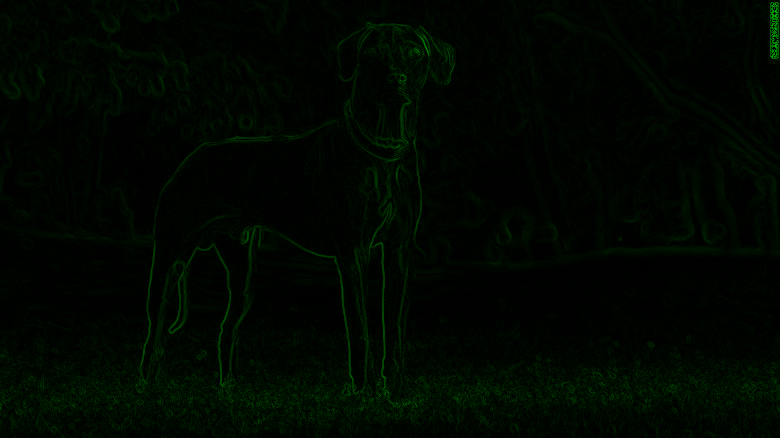

In [57]:
dogoGabung = np.zeros(mag.shape, dtype="uint8")
dogoGabung[:,:,1] = mag[:,:,1]
dogoHasil = Image.fromarray(dogoGabung)
dogoHasil

# Aplikasi Threshold

## Setup Threshold 30

In [58]:
T30 = np.where(mag > 30,255,1)

Tes Threshold sesuai dengan soal ke angka 30

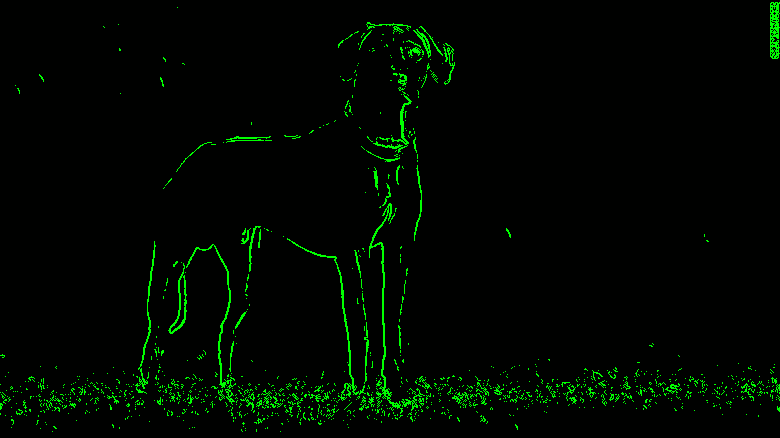

In [59]:
dogoHasil30 = np.zeros(T30.shape, dtype="uint8")
dogoHasil30[:,:,1] = T30[:,:,1]
Image.fromarray(dogoHasil30)

edge terlihat dengan jelas, namun noise masih banyak

## Setup Threshold 10

In [60]:
T10 = np.where(mag > 10,255,1)

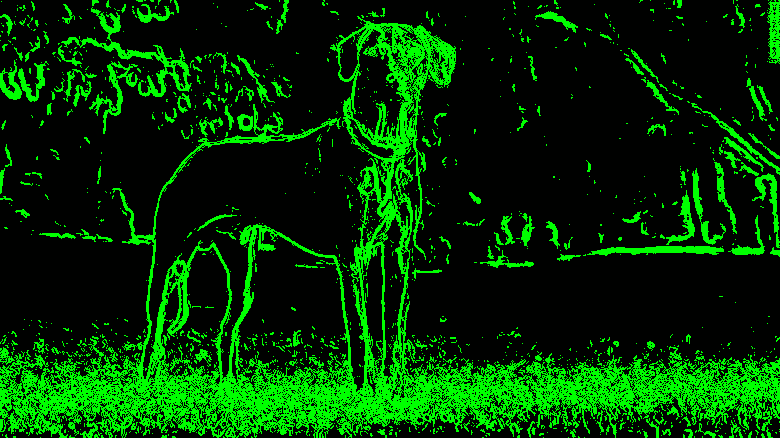

In [61]:
dogoHasil10 = np.zeros(T10.shape, dtype="uint8")
dogoHasil10[:,:,1] = T10[:,:,1]
Image.fromarray(dogoHasil10)

Hasil terlihat semakin jelas namun noise edge semakin banyak

## Setup Threshold 100

In [62]:
T100 = np.where(mag > 100,255,1)

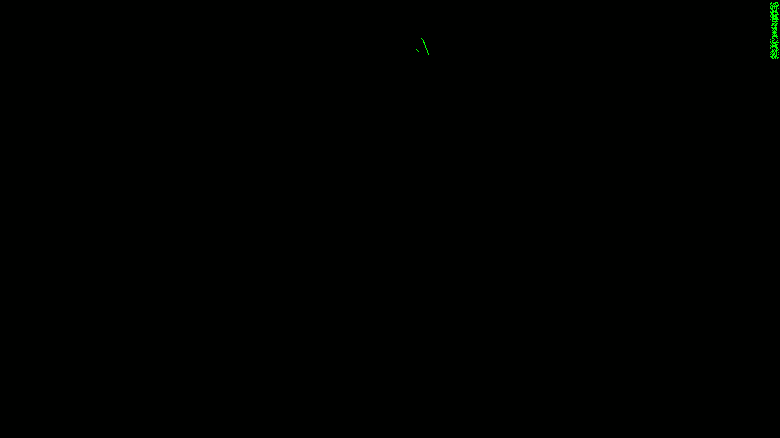

In [63]:
dogoHasil100 = np.zeros(T100.shape, dtype="uint8")
dogoHasil100[:,:,1] = T100[:,:,1]
Image.fromarray(dogoHasil100)

Edge semakin tidak terdeteksi

# Hasil

Dalam Setup Threshold dapat diambil kesimpulan bahwa : 
* Pada array Red dalam gambar dogo berlaku threshold semakin tinggi maka edge semakin tidak terdeteksi
* Semakin rendah Threshold maka akan semakin terlihat edge yang akan dicari, namun noise akan semakin besar

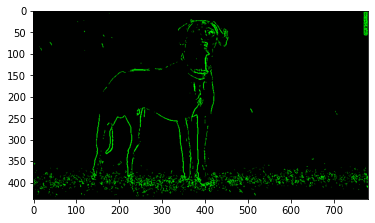

In [64]:
plt.imshow(dogoHasil30)